# Version 2.3 — Animation & Sink Term Demo

This notebook demonstrates:
- 2D heat equation solved using `LinearPDESystem2D`
- Use of a source/sink term via `rhs_func`
- Mass conservation vs decay behavior
- HTML5 animation via `animate_2d()` in `plotting_2d.py`

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../src"))

from core.pde_systems import LinearPDESystem2D
from numerics.laplacian_2d import make_laplacian_2d

ImportError: cannot import name 'LinearPDESystem2D' from 'core.pde_systems' (/Users/linearityproductions/Desktop/utility-sim-tools/src/core/pde_systems.py)

In [ ]:
N = 64
L = 10.0
dx = dy = L / N
x = np.linspace(-L/2, L/2, N, endpoint=False)
y = x.copy()
X, Y = np.meshgrid(x, y, indexing="ij")

# Initial Gaussian bump
u0 = np.exp(-(X**2 + Y**2) / 2)

In [ ]:
L_op = make_laplacian_2d(N, N, dx, dy)
system = LinearPDESystem2D(L_op, alpha=1.0)

u_history1 = system.evolve(u0, dt=0.005, steps=500)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


In [ ]:
def decay_sink(u, t):
    return -0.2 * u

system2 = LinearPDESystem2D(operator=L_op, alpha=1.0, rhs_func=decay_sink)
u_history2 = system2.evolve(u0, dt=0.005, steps=500)

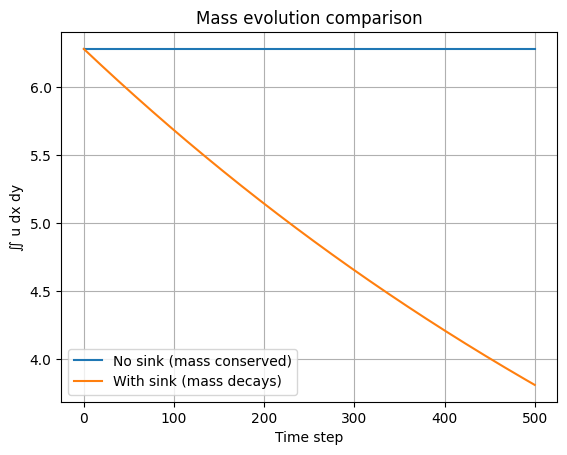

In [ ]:
mass1 = [np.sum(u) * dx * dy for u in u_history1]
mass2 = [np.sum(u) * dx * dy for u in u_history2]

plt.plot(mass1, label="No sink (mass conserved)")
plt.plot(mass2, label="With sink (mass decays)")
plt.xlabel("Time step")
plt.ylabel("∬ u dx dy")
plt.title("Mass evolution comparison")
plt.legend()
plt.grid(True)
plt.show()

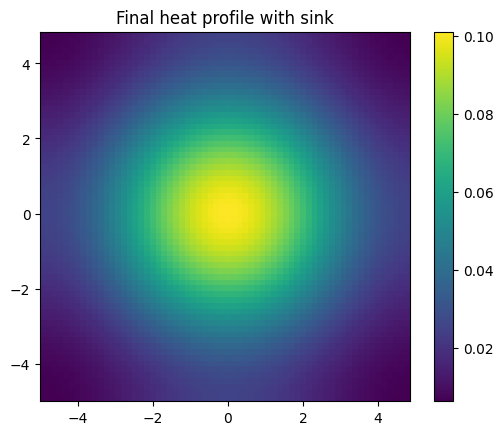

In [ ]:
plt.imshow(u_history2[-1], origin="lower", extent=[x.min(), x.max(), y.min(), y.max()])
plt.title("Final heat profile with sink")
plt.colorbar()
plt.show()